# Frequency Modulation

Frequency modulation takes the signal {eq}`general_s_of_t` 

$$
s(t) = A(t) \cos\big(\omega(t) t + \phi(t)\big)
$$

and sets

$$
\begin{align*}
A(t) &= A_c\\
\omega(t)t &= \int_0^t \omega_c + \beta_\omega m(t) dt \\
 &= \omega_c t + \beta_\omega \int_0^t m(t) dt \\
\phi(t) &= \phi_c
\end{align*}
$$

where

$A_c$ is the constant amplitude,<br>
$\omega_c$ is the constant center frequency, <br>
$\beta_\omega$ is the frequency deviation, assuming $ \left | \displaystyle\int_0^t m(t) dt \right | \le 1$<br>
$\phi_c$ is the constant phase.<br>

so that

$$
s(t) = A_c \cos\left(\omega_c t + \beta_\omega \int_0^t m(t) dt + \phi_c\right)
$$ (fm_s_of_t)

Below is an example of a frequency modulated signal where the message, $m(t)$ is a sine wave.

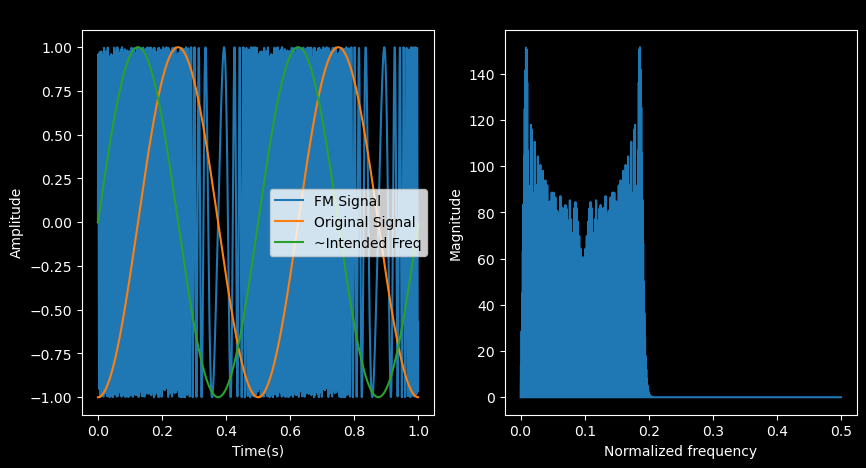

In [2]:
import numpy as np
import matplotlib.pyplot as plt

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)


#%% Generate #################################################################
t = np.linspace(0, 1, 2048, 0)
fc = 200
b = 15
data = -np.cos(2*np.pi * 2 * t)
phi = fc*t + b * data
fm = np.sin(2*np.pi * phi)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
f.set_facecolor('black')
ax1.set_facecolor('black')
ax2.set_facecolor('black')

#%% Plot #####################################################################
ax1.plot(t, fm)
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Amplitude")
ax1.plot(t, data)
intended_freq_approx = np.hstack([0, *np.diff([data])])
intended_freq_approx *= np.abs(data).max() / np.abs(intended_freq_approx).max()
ax1.plot(t, intended_freq_approx)
ax1.legend(['FM Signal', 'Original Signal', '~Intended Freq'])
ax1.title.set_text('Sinusoidally modulated FM')


#%% Plot #####################################################################
f = np.linspace(0, 0.5, 1023)
ax2.plot(f, np.abs(np.fft.fft(fm))[1:1024])
ax2.set_xlabel("Normalized frequency")
ax2.set_ylabel("Magnitude")
ax2.title.set_text('Spectrum of modulated signal')
plt.savefig("media/images/fm_signal_and_spectrum.png")

```{figure} media/images/fm_signal_and_spectrum.png
---
height: 450px
name: fm_signal_and_spectrum
---
The plots show the time-domain version of a sinusoidally modulated FM signal and the positive frequency spectrum of the signal.
```